### CLASS-IMBALANCED DATA

Out of the four shortlisted sellers, one is a very well known company. In such a situation, there is a high chance of this company getting most of the orders as compared to the rest of the other three sellers.
If the online shopping company decided to divert all the customers to this seller, for a large number of customers, it would acutally end up matching their preference.

Above is a classic scenario of Class-Imbalance, since one class is dominating the rest of the classes in terms of data points. 

Class-Imbalance is also seen in fraud detection, anti-money laundering, spam detection, cancer detection and many other situation.


Excercise:
    
we will be working with an online store company to help classify their customers based on their annual income, specifically, whether it exceeds 50,000 USD or not. 
    
In this exercise, you will observe how imbalanced data effects the performance of a model, and why it is so important to modify your process while working on an imbalanced dataset. We will also have to drop the missing values that are stored in the dataset as "?" before you start using it for the model training step:

Note
Dataset source: Ronny Kohavi and Barry Becker (1996). UCI Machine 
Learning Repository [https://archive.ics.uci.edu/ml/datasets/adult]. Data 
Mining and Visualization. Silicon Graphics

In [1]:
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df=df.replace('?', np.nan)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.dropna(inplace=True)

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

The number of people earning more than 50K is 11208 and less than or equal to 34014.
However there is a big issue with dataset. Around 74% of the dataset has people earning less than 50,000 USD; hence, it is a highly imbalanced dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


There are lot of categorical variables, to perform classifications, need to convert the categorical values (workclass, education, marital-status, occupation, relationshop, race, gender, native-country and  income) into numerical values.


## Using Label Encoders From Scikit Learn to convert the categorical to numerical variables

In [10]:
from sklearn.preprocessing import LabelEncoder

Labelenc_workclass = LabelEncoder()
df['workclass'] = Labelenc_workclass.fit_transform(df['workclass'])

Labelenc_education = LabelEncoder()
df['education'] = Labelenc_education.fit_transform(df['education'])

Labelenc_marital_status = LabelEncoder()
df['marital-status'] = Labelenc_marital_status.fit_transform(df['marital-status'])

Labelenc_occupation = LabelEncoder()
df['occupation'] = Labelenc_occupation.fit_transform(df['occupation'])

Labelenc_relationship = LabelEncoder()
df['relationship'] = Labelenc_relationship.fit_transform(df['relationship'])

Labelenc_race = LabelEncoder()
df['race'] = Labelenc_race.fit_transform(df['race'])

Labelenc_gender = LabelEncoder()
df['gender'] = Labelenc_gender.fit_transform(df['gender'])

Labelenc_native_country = LabelEncoder()
df['native-country'] = Labelenc_native_country.fit_transform(df['native-country'])

Labelenc_income = LabelEncoder()
df['income'] = Labelenc_income.fit_transform(df['income'])


In [11]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [12]:
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

Note: less than or equal to 50,000 is encoded as 0 and greater than 50,000 is encoded as 1 when you use the label encoder on the income column. 

## Split train-test data

In [13]:
X = df.drop(['income'],axis=1)
y = df['income']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36177, 14)
(9045, 14)
(36177,)
(9045,)


## Fit a RandomForestClassifer

In [16]:
clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_pred=clf_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



With the above report, infer that the model was able to classify class 0 (less than or equal 
to 50,000) with 88% precision whereas class 1 (greater than 50,000) had a 
precision of 74%.
class 1 (greater than 50,000) has a lower score in terms of both precision and 
recall. This can be attributed to the fact that the dataset was highly imbalanced, 
and this has led to the poor performance of the model.

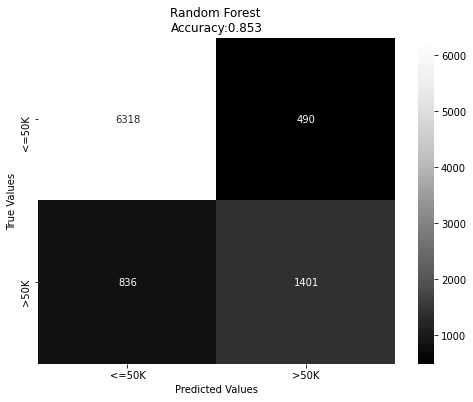

In [18]:
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,\
                     index = ['<=50K', '>50K'], \
                     columns = ['<=50K', '>50K'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
 .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

From the preceding confusion matrix, we can say that the model classified 836
people as earning less than or equal to 50,000 USD; however, they were actually 
earning more than 50,000 USD. Similarly, the model classified 490 people as 
earning more than 50,000 USD when they were actually earning less than or 
equal to 50,000 USD

## Dealing with Class-Imbalanced

One way of dealing with an imbalanced dataset is to assign a penalty to every 
wrong prediction on the minority class. This can be done using the class_weight
parameter available in scikit-learn, which assigns a penalty for every wrong prediction 
of the minority class. As an example, let's see how to use this class_weight
parameter in RandomForestClassifier:

In [19]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7, random_state=0, 
                                    class_weight='balanced')
clf_random.fit(X_train,y_train)
y_pred=clf_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6808
           1       0.69      0.72      0.70      2237

    accuracy                           0.85      9045
   macro avg       0.80      0.81      0.80      9045
weighted avg       0.85      0.85      0.85      9045



There are other strategies to deal with imbalanced data as well. Some of them are 
as follows:

• Random undersampling: In the case of random undersampling, the majority 
class samples are randomly eliminated to maintain class balance. The advantage 
of using this method is that it reduces the number of training samples, and 
hence the training time decreases; however, it may lead to underfitted models.

• Random oversampling: In the case of random oversampling, the minority class 
samples are replicated randomly to represent a higher representation of the 
minority class in the training sample. The advantage of using this method is that 
there is no information loss; however, it may lead to overfitting of the data.

• Synthetic Minority Oversampling Technique (SMOTE): This technique is used 
to mitigate the problems you faced in random oversampling. In this method, 
a subset of the minority class data is taken, and a similar replica of the data 
is created, which is added to the main datasets. The advantage of using this 
method is that it reduces overfitting the data and does not lead to any loss of 
information. However, it is not very effective for high-dimensional data.

## Imblearn SMOTE Function

this should be able to see an improvement in model performance for the annual income of more than 50,000 USD class. This should 
happen since by using SMOTE technique, the number of samples in the minority class 
(greater than 50,000) would increase, which would fix the issue of overfitting.  This in turn should increase the number of correctly classified samples for this class (greater than 50,000). we will see this information with the help of the confusion matrix.


In [20]:
import imblearn
from imblearn.over_sampling import SMOTE

In [21]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

## Resampled dataset can then be used to train models

In [22]:
clf_random.fit(X_resampled,y_resampled)
y_pred=clf_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6808
           1       0.67      0.71      0.69      2237

    accuracy                           0.84      9045
   macro avg       0.79      0.80      0.79      9045
weighted avg       0.85      0.84      0.84      9045



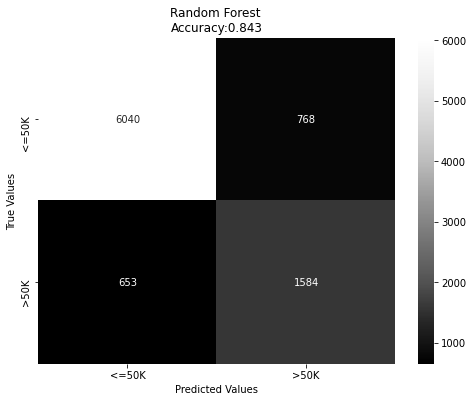

In [23]:
cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,\
                     index = ['<=50K', '>50K'],\
                     columns = ['<=50K', '>50K'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
 .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

without using class imbalance (SMOTE Technique), your classifier was able 
to identify only 1401 people who were earning more than 50,000 USD, whereas by 
using sampling techniques (SMOTE), the classifier identified 1584 people who were 
earning more than 50,000 USD.
